In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import graphviz 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from IPython.display import Image

# Explore House Sales Data

In [2]:
house_data = pd.read_csv("../input/kc_house_data.csv")
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
len(house_data)

21613

In [4]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Draw Plot 

In [23]:
def draw_plot(fig_size_x = 15,
              fig_size_y = 10,
              tick_params_labelsize = 14,
             xlabel_name_fontsize = 20,
             ylabel_name_fontsize = 20,
             title_name_fontsize = 20):
    
    #get current figure 
    fig=plt.gcf()
    
    #set the size of the figure
    fig.set_size_inches(fig_size_x,fig_size_y)

    #get axes of the current figure 
    ax =  fig.gca()

    # set the label size of the ticks of the axes
    ax.tick_params(labelsize=tick_params_labelsize)

    # set the label size of the x axis
    ax.set_xlabel(xlabel_name,fontsize = xlabel_name_fontsize)

    # set the label size of the y axis
    ax.set_ylabel(ylabel_name,fontsize = ylabel_name_fontsize)

     # set the title of the plot
    ax.set_title(title_name,fontsize = title_name_fontsize)

# Feature Selection

In [24]:
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [25]:
X = house_data.drop(columns=['price','id','date'])
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
y = house_data.price

# Modelling 

In [27]:
def create_tree(max_depth = 1):
    
    dt_reg = DecisionTreeRegressor(max_depth = max_depth)   

    dt_reg = dt_reg.fit(X, y)

    dot_data = tree.export_graphviz(dt_reg, out_file=None,feature_names=X.columns,
                                    class_names=y.name,
                                    filled=True, rounded=True,  special_characters=True)  

    graph = graphviz.Source(dot_data)  
    
    return(graph,dt_reg)

In [28]:
def create_tree_max_leaf_nodes(max_leaf_nodes = 1):
    
    dt_reg = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes)   

    dt_reg = dt_reg.fit(X, y)

    dot_data = tree.export_graphviz(dt_reg, out_file=None,feature_names=X.columns,
                                    class_names=y.name,
                                    filled=True, rounded=True,  special_characters=True)  

    graph = graphviz.Source(dot_data)  
    
    return(graph)

# Depth 1

In [29]:
def write_graph_to_file(graph,file_name):
    png_bytes = graph.pipe(format='png')

    with open(file_name,'wb') as f:
        f.write(png_bytes)

    Image(png_bytes)

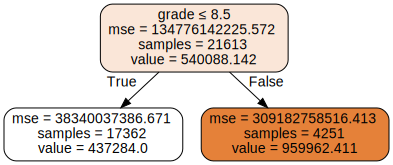

In [30]:
graph,tree_1 = create_tree()

write_graph_to_file(graph,'../docs/HouseSales/HouseSales_Depth_1.png')

graph

In [40]:
predictions = tree_1.predict(X.head())
predictions

array([437283.99953922, 437283.99953922, 437283.99953922, 437283.99953922,
       437283.99953922])

In [43]:
X.head()["grade"] <= 8.5

0    True
1    True
2    True
3    True
4    True
Name: grade, dtype: bool

# Calculate Mean Square Error 

In [31]:
def calculate_mse(samples):
    sse  = sum ( ( samples.price - samples.price.mean() ) ** 2 )

    mse = sse / len(samples)

    return(mse)

## Samples on the left analysis

In [32]:
samples = house_data[house_data.grade  <= 8.5]
round(samples.price.mean(),3)

437284.0

In [33]:
mse_left = calculate_mse(samples) ; mse_left

38340037386.671295

## Samples on the right analysis

In [34]:
samples = house_data[house_data.grade  > 8.5]
round(samples.price.mean(),3)

959962.411

In [35]:
mse_right = calculate_mse(samples) ; mse_right

309182758516.4172

# Depth 2

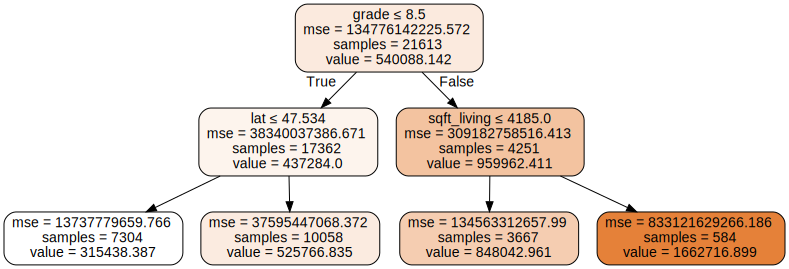

In [36]:
graph,tree_2 = create_tree(2)

write_graph_to_file(graph,'../docs/HouseSales/House_Sales_Depth_2.png')

graph

In [44]:
tree_2.predict(X.head())

array([315438.38691128, 525766.83455955, 525766.83455955, 315438.38691128,
       525766.83455955])

In [58]:
X.loc[:4,["grade","lat"]]

,grade,lat
0,7,47.5112
1,7,47.7210
2,6,47.7379
3,7,47.5208
4,8,47.6168


In [60]:
X.head()["lat"] <=47.534

0     True
1    False
2    False
3     True
4    False
Name: lat, dtype: bool

# Depth 3

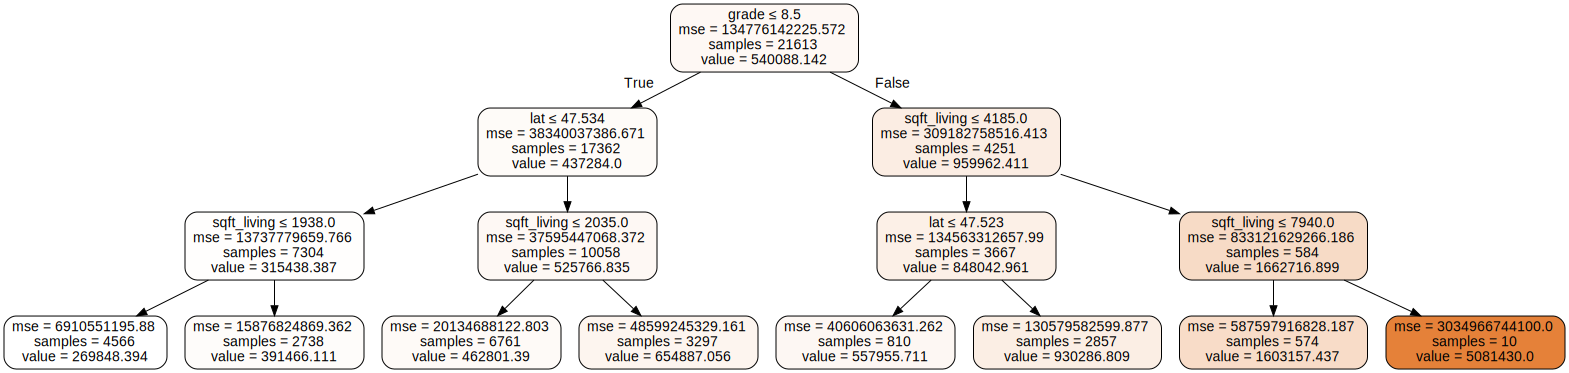

In [37]:
graph,tree_3 = create_tree(3)

write_graph_to_file(graph,'../docs/HouseSales/HouseSales_Depth_3.png')

graph

# Using Max Leaf Nodes

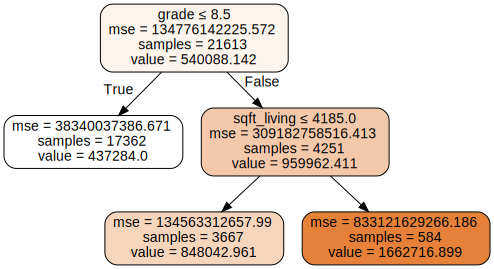

In [38]:
graph = create_tree_max_leaf_nodes(3)

write_graph_to_file(graph,'../docs/HouseSales/Max_Leaf_Nodes_3.png')

graph